In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

LIBRARY_ROOT_PATH = os.path.abspath(os.path.join(".."))
sys.path.append(LIBRARY_ROOT_PATH)

In [3]:
import torch
import cv2
from torchvision.io.image import read_image

In [4]:
from detector_kit.detector import ObjectDetector, pre_process_object_detector_input

In [5]:
device = torch.device("cuda:0")

object_detector = ObjectDetector.init_retina_net(device=device)

In [6]:
from glob import glob

ASSETS_PATH = os.path.join(LIBRARY_ROOT_PATH, "assets")
IMAGES_DIR_PATH = os.path.join(ASSETS_PATH, "images")
IMAGES_PATHS = glob(os.path.join(IMAGES_DIR_PATH, "*.jpg"))

In [7]:
img = cv2.imread(IMAGES_PATHS[0])

In [8]:
predictions = object_detector.detect_objects(image=img, confidence_threshold=0.4)

In [9]:
predictions

[BoundingBox(label='person', confidence=0.8962085843086243, left_top=Point(x=612, y=45), right_bottom=Point(x=1041, y=844)),
 BoundingBox(label='person', confidence=0.7286564707756042, left_top=Point(x=381, y=286), right_bottom=Point(x=645, y=843)),
 BoundingBox(label='person', confidence=0.6813836097717285, left_top=Point(x=1, y=273), right_bottom=Point(x=240, y=795)),
 BoundingBox(label='person', confidence=0.6495727300643921, left_top=Point(x=234, y=207), right_bottom=Point(x=548, y=820)),
 BoundingBox(label='person', confidence=0.4850282371044159, left_top=Point(x=220, y=343), right_bottom=Point(x=448, y=846)),
 BoundingBox(label='person', confidence=0.4759552776813507, left_top=Point(x=553, y=303), right_bottom=Point(x=647, y=509)),
 BoundingBox(label='person', confidence=0.46172836422920227, left_top=Point(x=617, y=276), right_bottom=Point(x=659, y=410)),
 BoundingBox(label='person', confidence=0.4351789057254791, left_top=Point(x=966, y=239), right_bottom=Point(x=1264, y=845)),


In [10]:
from detector_kit.visualisation import draw_bounding_boxes 

In [11]:
image_with_predictions = draw_bounding_boxes(image=img, bounding_boxes=predictions)

In [12]:
import matplotlib.pyplot as plt

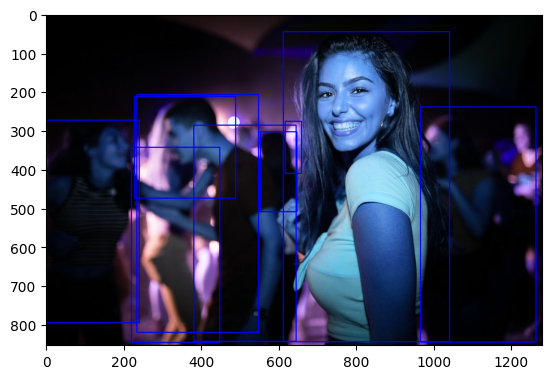

In [13]:
plt.imshow(image_with_predictions)